# The must-have machine learning technique for financial market data analysis

KMeans clustering is an unsupervised machine learning algorithm that works by creating clusters from a dataset and assigning each data point to its closest cluster. It was developed in the 1950s by Stuart Lloyd and later refined by J. MacQueen in 1967.

KMeans clustering can be used to identify stocks that are similar in terms of their performance and risk profile. By clustering stocks, investors can create more diversified portfolios, remove correlated assets, and identify candidates for pairs trading strategies. KMeans clustering can also be used to identify stocks that are undervalued or overvalued relative to their peers.

By understanding KMeans clustering, investors can make more informed decisions about which stocks to invest in and how to allocate their portfolios.

In [1]:
# Imports and set up

# First, start with the imports. You need pandas for manipulating data, scikit-learn to fit the KMeans model, Matplotlib for plotting, and OpenBB to get market data.

from math import sqrt

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rc("font", size=10)

from openbb_terminal.sdk import openbb
# Now, use pandas to read an HTML table from Wikipedia. The table has a list of the Dow Jones stocks which we’ll use for the analysis.

dji = (
    pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
)
symbols = dji.Symbol.tolist()
data = openbb.stocks.ca.hist(
    symbols,
    start_date="2020-01-01",
    end_date="2022-12-31"
)
# This code parses out the symbols and downloads price data using the OpenBB SDK.

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

NaN values found in: CSCO.  Backfilling data

In [2]:
# Data preprocessing

# We will use KMeans to cluster stocks together based on their returns and volatility.

moments = (
    data
    .pct_change()
    .describe()
    .T[["mean", "std"]]
    .rename(columns={"mean": "returns", "std": "vol"})
) * [252, sqrt(252)]
# This is a compact pandas statement that uses chaining. First, compute the percent change to get the daily returns. Then use the pandas describe method to get a DataFrame of summary statistics. Transpose it and select the mean and standard deviation. Then rename the columns and annualize then. You end up with a list of Dow Jones stocks, their annualized mean and standard deviation.

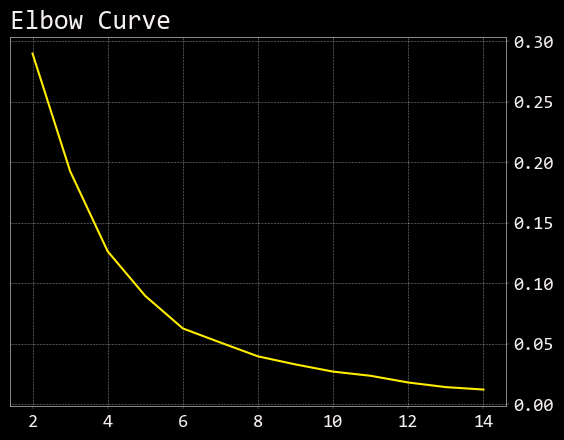

In [3]:
# Do KMeans clustering

# The first step is to measure inertia. Inertia measures how well a dataset was clustered by KMeans. It’s calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. Using inertia, you can determine the optimal number of clusters, where adding another cluster doesn’t significantly reduce the inertia.

sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(moments)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 15), sse)
plt.title("Elbow Curve");

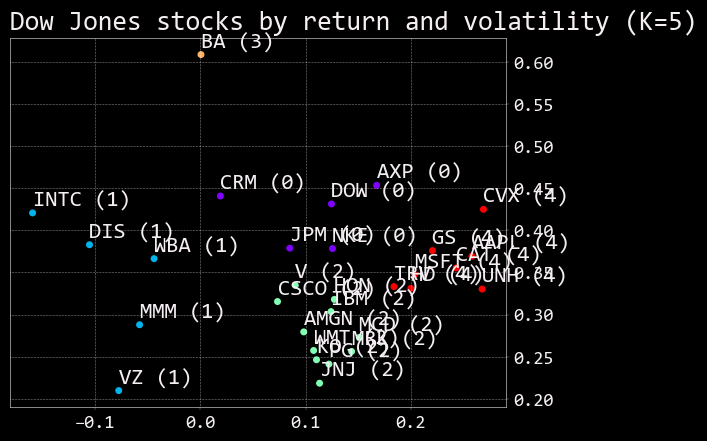

In [4]:
# Next, build and plot the clusters.

kmeans = KMeans(n_clusters=5, n_init=10).fit(moments)
plt.scatter(
    moments.returns,
    moments.vol,
    c=kmeans.labels_,
    cmap="rainbow",
);

plt.title("Dow Jones stocks by return and volatility (K=5)")
for i in range(len(moments.index)):
    txt = f"{moments.index[i]} ({kmeans.labels_[i]})"
    xy = tuple(moments.iloc[i, :] + [0, 0.01])
    plt.annotate(txt, xy)